# **AIPI 590 - XAI | Assignment #1**
### Interpretable ML Assignment
### Lindsay Gross


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18r50P2SgkHUKty02ZOacZssCm6J902fk)


- Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code
- Dataset title: Telco Customer Churn. 
- Collaborators: BlastChar (Owner). 
- License: Data files © Original Authors. 



## **Use to run colab:**

In [56]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [15]:
import os

# check if running in google colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
except ImportError:
    IN_COLAB = False

repo_name = "Interpretable-ML"
git_path = "https://github.com/lindsaygross/Interpretable-ML.git"

if IN_COLAB:
    print("running in google colab...")

    # mount google drive
    drive.mount('/content/drive')

    # navigate to drive location
    drive_path = '/content/drive/MyDrive/Duke ME AIPI'
    os.makedirs(drive_path, exist_ok=True)
    %cd "{drive_path}"

    # clone or update repo
    if not os.path.exists(repo_name):
        !git clone {git_path}
    else:
        %cd {repo_name}
        !git pull origin main
        %cd ..

    %cd {repo_name}

    # install dependencies
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        !pip install pandas numpy matplotlib seaborn scikit-learn

    # verify csv file exists
    csv_file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    if os.path.exists(csv_file):
        print(f"csv file found: {csv_file}")
    else:
        print("csv file not found")

else:
    # local setup
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        print("requirements.txt not found")

     |████████████████████████████████| 9.4 MB 382 kB/s eta 0:00:01
  Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
You should consider upgrading via the '/Users/lindsaygross/ME AIPI Classes/XAI/Interpretable-ML/.venv-1/bin/python3 -m pip install --upgrade pip' command.


## **Dependencies**

In [46]:
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# statsmodels libraries (for Durbin-Watson test)
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

import statsmodels.stats.api 
import statsmodels.stats.diagnostic
from statsmodels.stats.diagnostic import het_breuschpagan


## **Exploratory Data Analysis**
**Context:**
This dataset includes information about various customers who left their job within the last month.  


Each row in the dataset represents a customer, each column contains customer’s attributes, descibed below. The raw data contains 7043 rows (customers) and 21 columns (features).




## **Explanation of the Content of Dataset**

**Each row represents a single customer, each column contains the following customer’s attributes** 
<br> 
<br>
**Each column contains customer’s attributes as follows:**

**customerID:** The individual customer
<br> 
<br>
**gender:** Whether the customer is a male or a female
<br>
<br>
**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
<br>
<br>
**Partner:** Whether the customer has a partner or not (Yes, No)
<br>
<br>
**Dependents:** Whether the customer has dependents or not (Yes, No)
<br>
<br>
**Tenure:** Number of months the customer has stayed with the company
<br>
<br>
**PhoneService:** Whether the customer has a phone service or not (Yes, No
<br>
<br>
**MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
<br>
<br>
**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
<br>
<br>
**OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
<br>
<br>
**OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
<br>
<br>
**DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
<br>
<br>
**TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
<br>
<br>
**StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
<br>
**StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
<br>
**Contract:** The contract term of the customer (Month-to-month, One year, Two year)
<br>
<br>
**PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)
<br>
<br>
**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<br>
**MonthlyCharges:** The amount charged to the customer monthly
<br>
<br>
**TotalCharges:** The total amount charged to the customer
<br>
<br>
**Churn:** Whether the customer churned or not (Yes or No)
<br>
<br>


In [31]:
# Used Claude Sonnet 4 at 4:45pm 9/13/2025 to understand logic on how to load data in colab and in local environment.

"""
Perform an exploratory analysis of the dataset to understand the relationships between different
features and the target variable (churn). Use appropriate visualizations and statistical methods
to determine whether assumptions about linear, logistic, and GAM models are met.
"""
# load the data
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("loaded from local directory")
except:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab repo")
    except:
        df = pd.read_csv('/content/drive/MyDrive/Explainable AI/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab drive")

df.head()

# Convert 'TotalCharges' to numeric so that we can analyze the numeric effect on churn later on
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.info()




loaded from local directory
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7

In [32]:
# describe the data
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [33]:
# check for missing values
print(df.isnull().sum())    

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [34]:
# check for duplicate rows
duplicate_rows = df.duplicated()
df[duplicate_rows]
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Churn
No     5163
Yes    1869
Name: count, dtype: int64


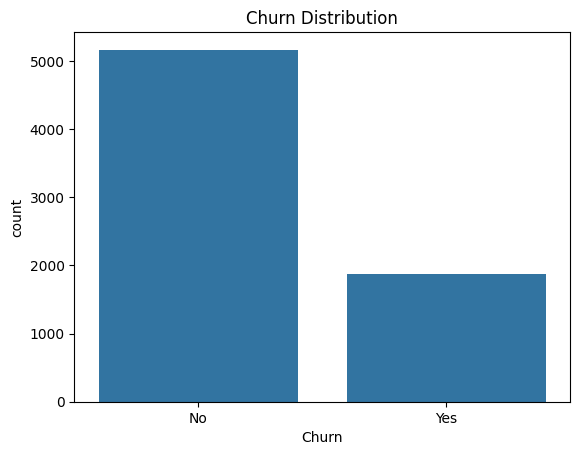

In [35]:
# Used claude at 4:50pm to help create binary column for churn

# visualize the churn distribution
print(df['Churn'].value_counts())
df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) # create a binary column for churn
# The above code snippet was created with the help of Claude Sonnet 4 at 11:28am on 9/14/2025.
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

### Churn Distribution
The target variable `Churn` is imbalanced: most customers stay, while a smaller amount leave.  
This imbalance is important because it can affect model performance, especially for **linear** and **logistic regression** models. 


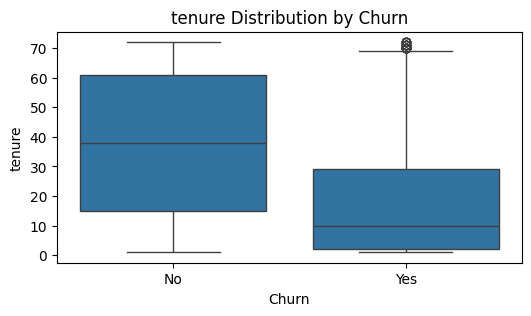

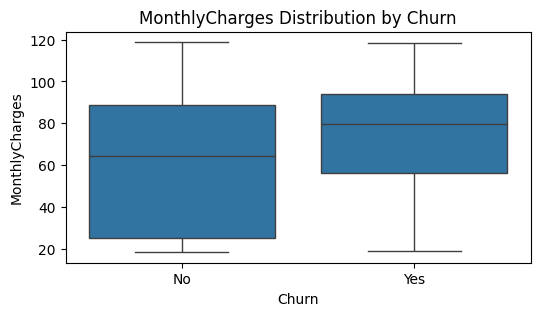

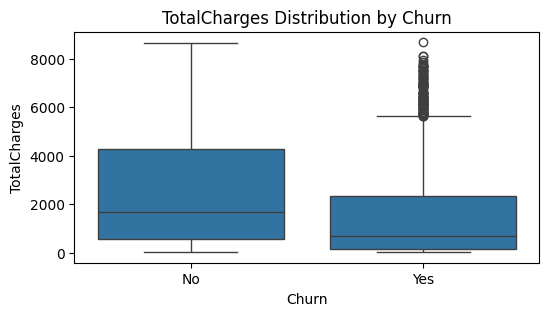

In [36]:
# Numerical features distribution vs Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(6, 3))  # Used Claude Sonnet 4 at 5:00pm 9/13/2025 to find best figure size
    sns.boxplot(x='Churn', y=feature, data=df) 
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

## **EDA Numeric Features vs Churn**

**Tenure Distribution by Churn**

- Customers who churned generally have shorter tenure with the company.
- Most churned customers left within the first ~20 months.
- Non-churned customers are more spread out, with many staying long-term.

Tenure has a strong negative relationship with churn. This relationship looks non-linear (sharp drop in early months), which may not be well captured by linear regression, but logistic regression or a GAM can handle it better.

**Summary of above EDA**
---
<br>
- The above eda display a simple analysis of the dataframe calling the info function.

# Assumptions Explained

**Linearity**

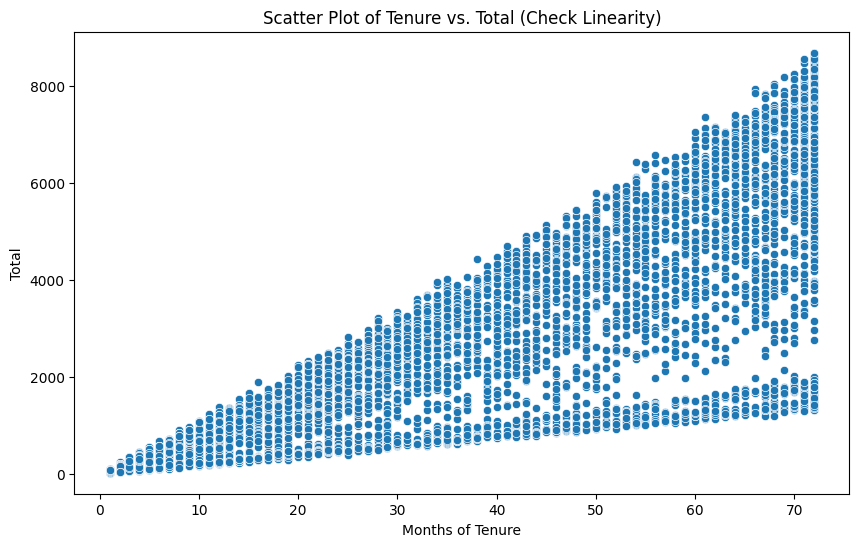

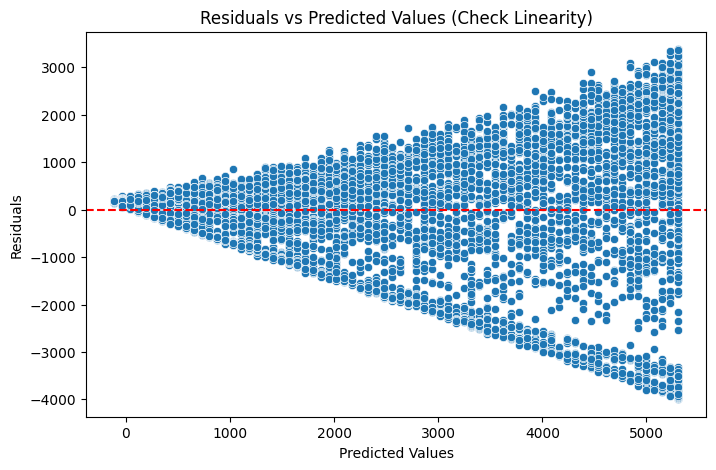

In [49]:
# Check for assumptions of linearity

# Scatter plot of tenure vs TotalCharges
df_cleaned = df.dropna(subset=['tenure', 'TotalCharges'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df_cleaned)
plt.title('Scatter Plot of Tenure vs. Total (Check Linearity)')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()


# Residuals vs Predicted Values
X = df[['tenure']]
X = sm.add_constant(X)   # add constant for intercept
y = df['TotalCharges']

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8,5)) # Used Claude Sonnet 4 at 3:56pm 9/14/2025 to help determine figure size
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Check Linearity)")
plt.show()


The scatter plot of tenure vs total charges shows a generally positive linear trend, suggesting that the assumption of linearity is appropriate.  

The residuals vs predicted values plot shows points scattered around zero without a strong curved pattern. There is some spread as the predicted values increase, but the overall trend does not show a clear curve. This suggests that the linearity assumption is mostly satisfied, making linear regression appropriate here.


**Independence of Observations**

In [38]:
# Check for assumptions of Independence of Observations

# check for duplicate customer IDs
if len(df['customerID']) == len(df['customerID'].unique()):
    print("All customer IDs are unique. No duplicates found.")
else:
    print("There are duplicate customers")
    
# Durbin-Watson test for first order autocorrelation

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) # create a binary column for churn

X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce') # Used Claude Sonnet 4 at 3:11pm 9/14/2025 to help with this code snippet
y = df['ChurnBinary']

# drop missing values
X = X.dropna()
Y = y.loc[X.index] # used Claude Sonnet 4 at 3:15pm 9/14/2025 to help with this code snippet

X = sm.add_constant(X) # add constant term for intercept using statsmodels
model = sm.Logit(Y, X)
result = model.fit()
# Used claude Sonnet 4 at 3:17 pm 9/14/2025 to generate the code snippet above

residuals = result.resid_response # get the residuals. resid_response gives the difference between observed and predicted values
# used claude Sonnet 4 at 3:20pm 9/14/2025 to help with the above code snippet
dw = durbin_watson(residuals) 
print(f'Durbin-Watson statistic: {dw}')

All customer IDs are unique. No duplicates found.
Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
Durbin-Watson statistic: 2.00336752535415


 **Uniqueness/Check for Duplicates**

All customer IDs in the dataset are unique, so there aren’t any duplicates. This shows that each customer is an independent observation.  

---
 **Independence of Observations (Durbin-Watson Test)**

The **Durbin-Watson test** tests for first-order autocorrelation (independence of observations)  on the residuals of our logistic regression model. The test value ranges from 0 to 4, where:

- 0 indicates strong positive autocorrelation (residuals highly related to each other),
- 2 indicates no autocorrelation (residuals are independent),
- 4 indicates strong negative autocorrelation.

Since the result was **~2.00**, this indicates that there is **no evidence** of autocorrelation in the residuals, meaning that the assumption of independence of observations is satisfied.


**Homoscedasticity**

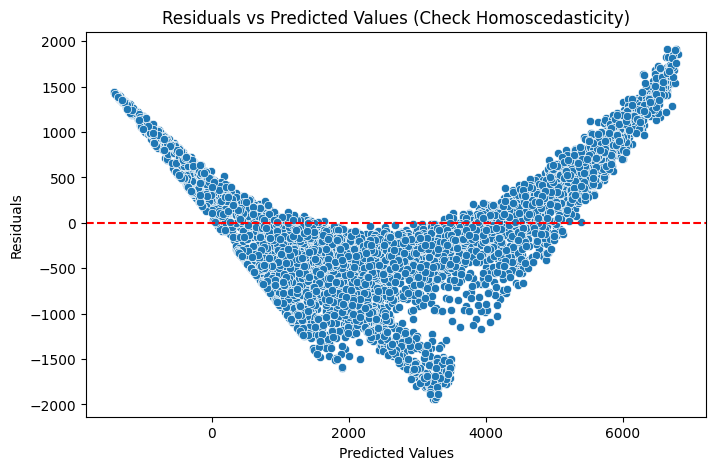

{'Lagrange multiplier statistic': 523.1080217202233, 'p-value': 2.5617477520957802e-114, 'f-value': 282.45408718883186, 'f p-value': 1.0278171038678204e-118}


In [43]:
# Check for assumptions of Homoscedasticity

X = df[['tenure', 'MonthlyCharges']]
X = sm.add_constant(X)   
y = df['TotalCharges']

model = sm.OLS(y, X).fit() # Used Claude Sonnet 4 at 3:39pm 9/14/2025 to help with this code line
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Predicted plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Check Homoscedasticity)")
plt.show()

#Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value'] # Used Claude Sonnet 4 at 3:50pm 9/14/2025 to help with this code snippet
print(dict(zip(labels, bp_test)))





The residuals vs predicted values plot is not uniform;  the spread of residuals gets wider as the predicted values increase. This pattern indicates that the variance is not constant, which indicates heteroscedasticity.


**Normality of Residuals**

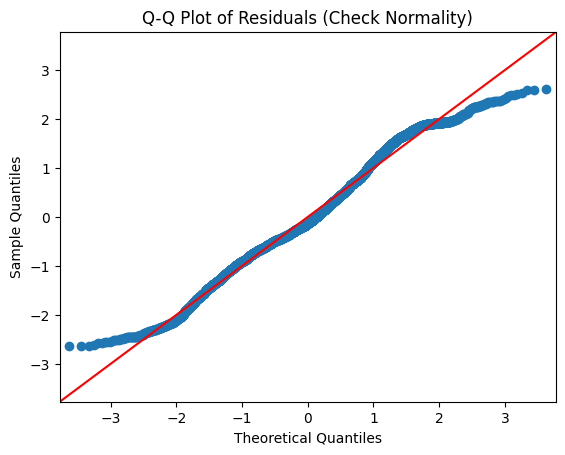

In [47]:
# Check for assumptions of Normality of Residual

# Use Q-Q plot for normality of residuals
sm.qqplot(residuals, line='45', fit=True) # Used Claude Sonnet 4 at 3:510pm 9/14/2025 to help with this code line
plt.title("Q-Q Plot of Residuals (Check Normality)")
plt.show()


The **Q-Q plot** compares the residuals to a normal distribution. If the points fall close to the 45-degree line, the residuals are approximately normal. Deviations from the line, suggest the residuals are not normally distributed.

The Q-Q plot shows that the residuals mostly follow the 45-degree line, indicating that the residuals are approximate normal. Although, since there are small deviations the upper and lower and upper ends, this might indicate that the residuals are not perfetly normal in distribution, meaning that the normality assumption is only partially met.


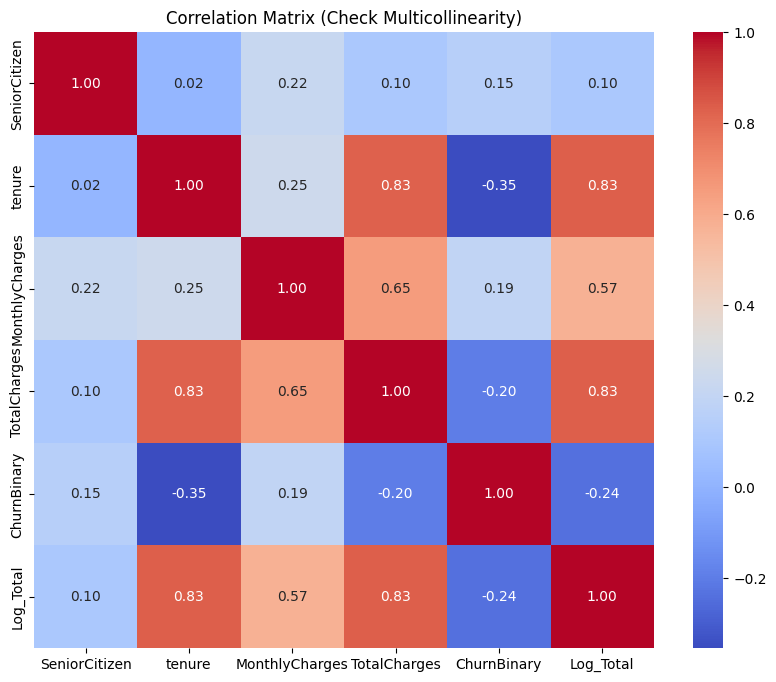

In [ ]:
# Check for assumptions of No Multicollinearity
# Correlation Matrix


plt.figure(figsize=(10,8)) # Used Claude Sonnet 4 at 4:00pm 9/14/2025 to help determine figure size
sns.heatmap(
    df.select_dtypes(include=['float64','int64']).corr(),  
    annot=True, fmt=".2f", cmap="coolwarm" # Used Claude Sonnet 4 at 4:02pm 9/14/2025 to help with this code line
)
plt.title("Correlation Matrix (Check Multicollinearity)")
plt.show()




The correlation matrix shows how strongly predictors are related to each other. Most variables have low to moderate correlations, but there are some high correlations (ex: tenure and TotalCharges, tenure and Log_Total, both above 0.8). This suggests possible multicollinearity, which could affect regression models by inflating variance of coefficients.

In [ ]:
# Check for assumptions of No Influential Outliers

In [ ]:
# Coefficent Comparison Plot

In [ ]:
# Residual Plot

In [ ]:
# Actual vs Predicted Plot

In [ ]:
# Feature Importance Plot

In [ ]:
# Lasso Regualrization Plot

In [ ]:
# Linear Regression Model

In [ ]:
# Logistic Regression Model

In [ ]:
# GAM Model

# Discussion of Strengths and Weaknesses

# Recommendation of telecommunications model
Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown